#  Linear regression

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data1.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y

# Separar las columnas en X y y
X = data[:, 0]  # Primera columna: población
y = data[:, 1]  # Segunda columna: ganancia

# Mostrar las primeras 5 entradas para verificar
print("Primeras 5 entradas de X:", X[:5])
print("Primeras 5 entradas de y:", y[:5])



[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
Primeras 5 entradas de X: [6.1101 5.5277 8.5186 7.0032 5.8598]
Primeras 5 entradas de y: [17.592   9.1302 13.662  11.854   6.8233]


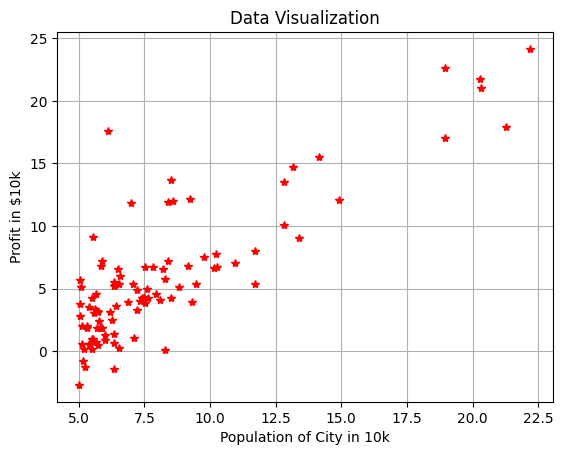

In [2]:
# ==================== Part 1: Plotting ====================


# Plot data
plt.plot(X, y, '*r', label='Profit')  # Red stars for positive examples
plt.grid(True)  # Turn on the grid
#plt.legend()    # Add legend
plt.xlabel('Population of City in 10k')  # Label for x-axis
plt.ylabel('Profit in $10k')  # Label for y-axis
plt.title('Data Visualization')  # Add a title
plt.show()

# Cost Function

The objective of linear regression is to minimize the cost function:
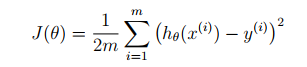

where the hypothesis h is given by

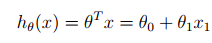

**Create a matrix by adding a column of ones to the vecto X**

You should expect to see a cost of approximately 32.07


In [3]:
import numpy as np

# Cargar los datos
data = np.loadtxt('ex1data1.txt', delimiter=',')

# Separar X y y
m = data.shape[0]
y = data[:, [1]]              # Asegurar que y es una matriz columna (m x 1)
X = data[:, [0]]              # Solo la primera columna
X = np.hstack([np.ones((m, 1)), X])  # Agregar una columna de unos (ahora X es m x 2)

# Inicializar theta
theta = np.zeros((2, 1))

# Implementar la función de costo
def cost_function(theta, X, y):
    m = len(y)
    theta = theta.reshape(-1, 1)  # Asegura que theta tenga forma (2,1)
    predictions = X @ theta      # Predicciones del modelo
    errors = predictions - y
    J = (1 / (2 * m)) * np.dot(errors.T, errors)  # Función de costo
    return J[0][0]  # Retornar como escalar

# Prueba
print(f"Model parameters: \n{theta}")
print(f"Cost function: {cost_function(theta, X, y):.2f}")  # Debería ser aproximadamente 32.07


Model parameters: 
[[0.]
 [0.]]
Cost function: 32.07


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

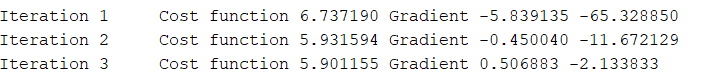



Iteration 1	Cost: 6.737190
Iteration 2	Cost: 5.931594
Iteration 3	Cost: 5.901155
Theta found by gradient descent:  [0.05782293 0.79134812]
For population = 35,000, we predict a profit of 28275.41
For population = 35,000, we predict a profit of 55972.60


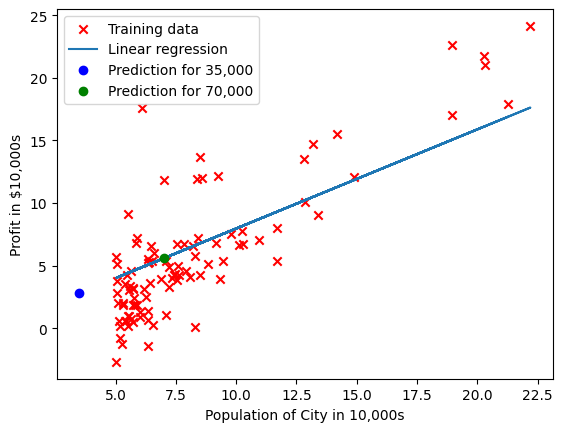

In [4]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 3
m = data.shape[0]
y = data[:, [1]]
X = data[:, [0]]
X = np.hstack([np.ones((m, 1)), X])
theta = np.zeros((2, 1))
alpha = 0.01
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)  # number of training examples
    J_history = np.zeros(iterations)

    for iter in range(iterations):
        # Calcular la predicción
        predictions = X @ theta

        # Calcular el error
        errors = predictions - y

        # Calcular el gradiente
        gradient = (1 / m) * (X.T @ errors)

        # Actualizar los parámetros
        theta = theta - alpha * gradient

        # Guardar el costo para esta iteración
        J_history[iter] = cost_function(theta, X, y)
        print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}")

    return theta


theta = gradientDescent(X, y, theta, alpha, iterations);
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]) @ theta
print(f'For population = 35,000, we predict a profit of {(predict1 * 10000).item():.2f}')

predict2 = np.array([1, 7.0]) @ theta
print(f'For population = 35,000, we predict a profit of {(predict2 * 10000).item():.2f}')


# Plot the linear fit
plt.scatter(X[:, 1], y, color='red', marker='x', label='Training data')  # X[:,1] is the feature (since X[:,0] is the bias term)
plt.plot(X[:, 1], X @ theta, label='Linear regression')  # X @ theta gives the predicted values
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(3.5, predict1.item(), 'ob', label='Prediction for 35,000')
plt.plot(7.0, predict2.item(), 'og', label='Prediction for 70,000')
plt.legend()
plt.show()

# Visualization

Visualizing J(theta_0, theta_1) ...


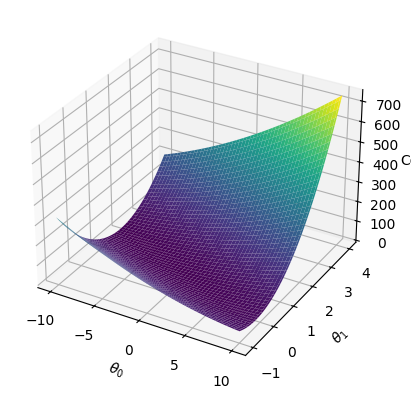

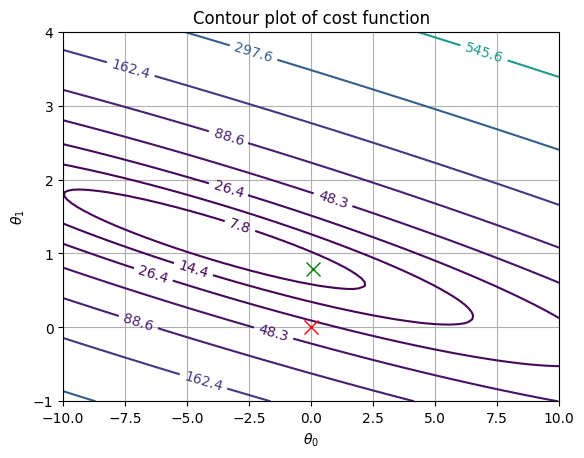

In [5]:
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

print('Visualizing J(theta_0, theta_1) ...')

theta_init = np.zeros((2, 1))
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = cost_function(t, X, y)

# Transpose J_vals to match the orientation of MATLAB's surf
J_vals = J_vals.T

# Surface plot
theta0_vals_mesh, theta1_vals_mesh = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals_mesh, theta1_vals_mesh, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')

# Contour plot
plt.figure()
cp = plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.clabel(cp)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

# Plot the final theta found by gradient descent
plt.plot(theta_init[0, 0], theta_init[1, 0], 'rx', markersize=10, linewidth=2)
plt.plot(theta[0, 0], theta[1, 0], 'gx', markersize=10, linewidth=2)
plt.title('Contour plot of cost function')
plt.grid(True)
plt.show()
